# Adaboost for Regression
- Author  : Payam Parvazmanesh
- Contact : payam.manesh@gmail.com
- Machine Learning

## AdaBoost for Regression

AdaBoost can also be applied to regression tasks, where the goal is to predict continuous values rather than categorical ones. The basic steps and methodology are similar to the classification case, but with some adaptations to handle continuous outputs.

The general boosting procedure for regression still involves two key operations: `Adjust_Distribution` and `Combine_Outputs`. However, for regression, the loss function and the output of each weak learner are adjusted accordingly.



![How AdaBoost for Regression Works](./pic/adareg.png)



**Cost Function for AdaBoost Regression**

The cost function in AdaBoost regression is designed to minimize the residuals of the predictions of the weak learners. We aim to minimize the following function:

$$
J(\theta, \alpha) = E[l(e)] + \lambda G(\theta, \alpha)
$$

where $( e )$ is the error (residuals), $( l )$ is the loss function, $( \theta )$ represents the parameters of the weak learners, and $( \alpha )$ denotes the weights of the weak learners.

For regression, the error for the $( i )-th$ sample is given by:

$$
e_i = y_i - f(x_i)
$$

where $( f(x_i) )$ is the prediction of the combined model, and $( y_i )$ is the true value.

The weak learner’s output for a given sample $( x_i )$ is denoted by $( h_m(x_i) )$, and the combined model’s prediction is given by:

$$
H(x) = \sum_{m=1}^{T} \alpha_m h_m(x)
$$

Thus, the goal of boosting is to minimize the residual error by adjusting the weights $( \alpha_m )$ for each weak learner.

## Steps for AdaBoost Regression

**Step 1: Initialize the Distribution**

Initially, all data points have equal weight:

$$
D_1(x) = \frac{1}{m}
$$

where $( m )$ is the total number of samples in the dataset.

**Step 2: Train Weak Learners**

For each boosting iteration $( t )$:

- Train a weak learner $( h_t(x) )$ on the dataset $( D_t )$.
- Compute the prediction $( h_t(x) )$ and the residuals for each sample $( i )$:
  $$ e_i = y_i - h_t(x_i) $$

**Step 3: Calculate the Error**

Calculate the error $( \epsilon_t )$ for the weak learner:

$$
\epsilon_t = \frac{\sum_{i=1}^{m} D_t(x_i) \cdot (y_i - h_t(x_i))^2}{\sum_{i=1}^{m} D_t(x_i)}
$$

The error $( \epsilon_t )$ is the weighted mean squared error between the predictions of the weak learner and the true values.

**Step 4: Compute the Weight $( \alpha_t )$**

If $( \epsilon_t > 0.5 )$, then we set $( \alpha_t = 0 )$ and continue with the next iteration. Otherwise, the weight $( \alpha_t )$ of the weak learner is calculated using:

$$
\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)
$$

This weight reflects the importance of the weak learner in the final model.

**Step 5: Update the Distribution**

Update the weight distribution for the next iteration based on the residuals:

$$
D_{t+1}(x_i) = D_t(x_i) \cdot \exp \left( - \alpha_t (y_i - h_t(x_i))^2 \right)
$$

The distribution is normalized so that the weights sum to 1, ensuring it remains a valid probability distribution.

**Step 6: Final Prediction**

The final prediction is a weighted sum of all weak learners:

$$
H(x) = \sum_{t=1}^{T} \alpha_t h_t(x)
$$

The final model combines the weak learners based on their weighted contribution to reduce the residual error.

## AdaBoost Regression Algorithm

**Input:**
- Dataset $( D = \{(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)\} )$
- Base learning algorithm $( L )$
- Number of learning rounds $( T )$

**Process:**
1. Initialize the weight distribution $( D_1(x) = \frac{1}{m} )$.
2. For $( t = 1, \dots, T )$:
   - Train a weak learner $( h_t )$ on the dataset $( D_t )$.
   - Compute the error $( \epsilon_t )$ of $( h_t )$.
   - If $( \epsilon_t > 0.5 )$, set $( \alpha_t = 0 )$ and continue.
   - Calculate $( \alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right) )$.
   - Update the distribution for the next round:
     
     $$
     D_{t+1}(x_i) = D_t(x_i) \cdot \exp \left( - \alpha_t (y_i - h_t(x_i))^2 \right)
     $$
     
3. End the loop.

**Output:**
The final hypothesis is given by:

$$
H(x) = \sum_{t=1}^{T} \alpha_t h_t(x)
$$

## How AdaBoost for Regression Works

In this method, each weak learner corrects the errors made by previous learners. Initially, the weak learners may perform poorly, but with each iteration, the model improves by focusing on the data points that were previously mispredicted. The weights $( \alpha_t )$ of the weak learners adjust the impact of each learner on the final prediction, with better-performing learners receiving higher weights.




## AdaBoost Regression: Numeric Example

Let's walk through a simple numeric example of AdaBoost for Regression using a small dataset.

#### Example Dataset

| $( x_i )$ | $( y_i )$ (True Value) |
|-----------|------------------------|
| 1         | 2                      |
| 2         | 3                      |
| 3         | 3                      |
| 4         | 5                      |

The objective is to use AdaBoost to predict the value of $( y )$ based on $( x )$.

#### Step-by-Step Solution

### **Step 1: Initialize the Distribution**

Initially, all data points have equal weight:

$$
D_1(x_i) = \frac{1}{m} = \frac{1}{4} = 0.25 \quad \text{for each sample}
$$

### **Step 2: Train Weak Learner**

We will use a simple weak learner, for example, a regression tree with a depth of 1 (stump) that fits a constant value. This weak learner will predict the average value of the training set for each $( x )$.

**For the first iteration:**

- Train the weak learner $( h_1 )$ on the data.
- A regression tree with a single split gives the average of all $( y_i )$, which is:

$$
h_1(x) = \frac{2 + 3 + 3 + 5}{4} = 3.25
$$

So, $( h_1(x) )$ predicts 3.25 for every input.

### **Step 3: Calculate the Error of the Weak Learner**

The error $( \epsilon_1 )$ for weak learner $( h_1 )$ is calculated as the weighted sum of squared errors:

$$
\epsilon_1 = \frac{1}{4} \sum_{i=1}^{4} D_1(x_i) \cdot (y_i - h_1(x_i))^2
$$

For each $( x_i )$, the error is:

- For $( x_1 = 1 )$, error = $( (2 - 3.25)^2 = 1.5625 )$
- For $( x_2 = 2 )$, error = $( (3 - 3.25)^2 = 0.0625 )$
- For $( x_3 = 3 )$, error = $( (3 - 3.25)^2 = 0.0625 )$
- For $( x_4 = 4 )$, error = $( (5 - 3.25)^2 = 3.0625 )$

Now calculate the weighted error:

$$
\epsilon_1 = \frac{1}{4} \left( 0.25 \cdot 1.5625 + 0.25 \cdot 0.0625 + 0.25 \cdot 0.0625 + 0.25 \cdot 3.0625 \right)
$$

$$
\epsilon_1 = \frac{1}{4} \left( 0.390625 + 0.015625 + 0.015625 + 0.765625 \right)
$$

$$
\epsilon_1 = \frac{1.1875}{4} = 0.296875
$$

### **Step 4: Compute the Weight \( \alpha_1 \)**

The weight $( \alpha_1 )$ for weak learner $( h_1 )$ is calculated using:

$$
\alpha_1 = \frac{1}{2} \ln \left( \frac{1 - \epsilon_1}{\epsilon_1} \right)
$$

Substituting $( \epsilon_1 = 0.296875 )$:

$$
\alpha_1 = \frac{1}{2} \ln \left( \frac{1 - 0.296875}{0.296875} \right) = \frac{1}{2} \ln \left( \frac{0.703125}{0.296875} \right)
$$

$$
\alpha_1 = \frac{1}{2} \ln(2.367) = 0.4325
$$

### **Step 5: Update the Distribution**

Next, we update the distribution $( D_2(x_i) )$ for the next iteration. The new weight distribution is:

$$
D_2(x_i) = D_1(x_i) \cdot \exp \left( - \alpha_1 (y_i - h_1(x_i))^2 \right)
$$

For each sample $( i )$:

- For $( x_1 = 1 )$, update: $( 0.25 \cdot \exp(-0.4325 \cdot 1.5625) = 0.25 \cdot \exp(-0.6755) = 0.25 \cdot 0.5096 = 0.1274 )$
- For $( x_2 = 2 )$, update: $( 0.25 \cdot \exp(-0.4325 \cdot 0.0625) = 0.25 \cdot \exp(-0.0270) = 0.25 \cdot 0.9730 = 0.2432 )$
- For $( x_3 = 3 )$, update: $( 0.25 \cdot \exp(-0.4325 \cdot 0.0625) = 0.2432 ) (same as ( x_2 ))$
- For $( x_4 = 4 )$, update: $( 0.25 \cdot \exp(-0.4325 \cdot 3.0625) = 0.25 \cdot \exp(-1.3255) = 0.25 \cdot 0.2643 = 0.0661 )$

Now normalize the updated weights so they sum to 1:

$$
\text{Total weight} = 0.1274 + 0.2432 + 0.2432 + 0.0661 = 0.6799
$$

Normalize:

$$
D_2(x_1) = \frac{0.1274}{0.6799} = 0.1875, \quad D_2(x_2) = \frac{0.2432}{0.6799} = 0.3588
$$

$$
D_2(x_3) = \frac{0.2432}{0.6799} = 0.3588, \quad D_2(x_4) = \frac{0.0661}{0.6799} = 0.0973
$$

### **Step 6: Final Prediction**

After one iteration, the model is:

$$
H(x) = \alpha_1 h_1(x) = 0.4325 \cdot 3.25 = 1.405625
$$

Thus, the prediction after the first iteration is 1.405625 for all inputs.

This is a simple demonstration of the first iteration. In subsequent iterations, the weak learner will focus more on the data points that were predicted poorly, and the overall model will improve.

D:\APP\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.21627519426728856


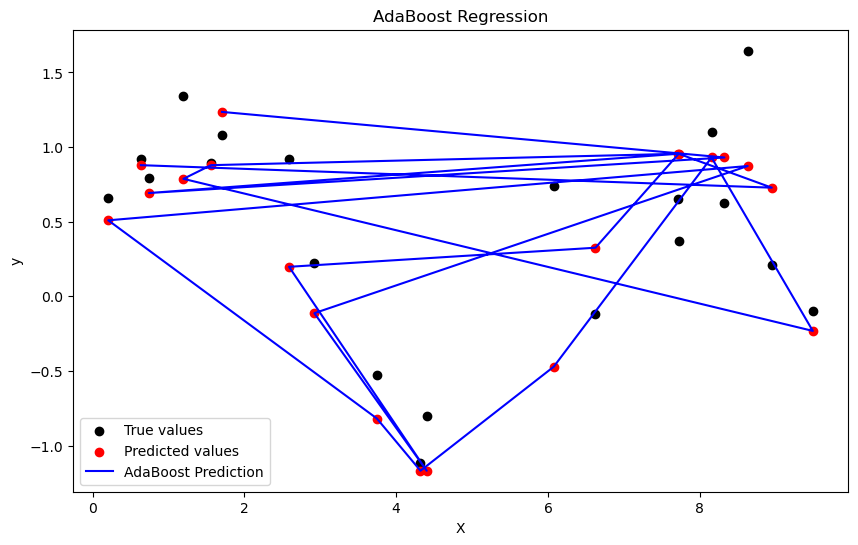

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some example regression data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])  # Sine function with noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base regressor (a DecisionTreeRegressor)
base_regressor = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoost Regressor
ada_regressor = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=50, random_state=42)

# Train the AdaBoost Regressor
ada_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = ada_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.plot(X_test, ada_regressor.predict(X_test), color='blue', label='AdaBoost Prediction')
plt.title("AdaBoost Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
